In [10]:
import matplotlib.pyplot as plt
import cv2
import skimage
import os
import numpy as np
import random as rand

In [11]:
import keras
import tensorflow

In [35]:
from tensorflow.python.summary.summary_iterator import summary_iterator

In [38]:
old_1_path = "/home/hmeng/Mask_RCNN-for-SUN-RGB-D/logs/olddata_30/events.out.tfevents.1589827599.hmeng-25151"
old_2_path = "/home/hmeng/Mask_RCNN-for-SUN-RGB-D/logs/olddata_30/events.out.tfevents.1589910128.hmeng-21668"

In [41]:
old_1_train, old_1_val = [], []
for e in summary_iterator(old_1_path):
    for v in e.summary.value:
        #if v.tag == 'loss' or v.tag == 'accuracy':
            #print(v.simple_value)
        if v.tag == "val_loss":
            old_1_val.append(v.simple_value)
        elif v.tag == "loss":
            old_1_train.append(v.simple_value)
        #print(v.tag)

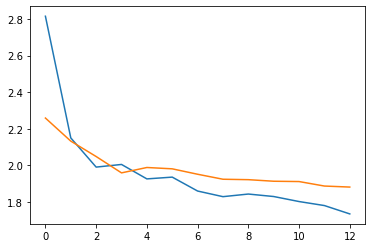

In [42]:
plt.plot(old_1_train)
plt.plot(old_1_val)
plt.show()

In [44]:
old_2_train, old_2_val = [], []
for e in summary_iterator(old_2_path):
    for v in e.summary.value:
        #if v.tag == 'loss' or v.tag == 'accuracy':
            #print(v.simple_value)
        if v.tag == "val_loss":
            old_2_val.append(v.simple_value)
        elif v.tag == "loss":
            old_2_train.append(v.simple_value)
        #print(v.tag)

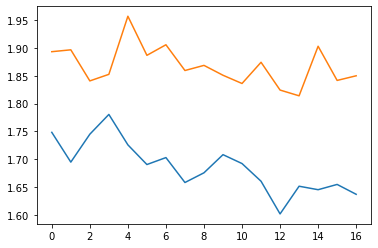

In [45]:
plt.plot(old_2_train)
plt.plot(old_2_val)
plt.show()

In [46]:
keep_old_path = "/home/hmeng/Mask_RCNN-for-SUN-RGB-D/logs/keep_train_old/events.out.tfevents.1590521835.dsmlp-jupyter-hmeng"

In [47]:
keep_old_train, keep_old_val = [], []
for e in summary_iterator(keep_old_path):
    for v in e.summary.value:
        #if v.tag == 'loss' or v.tag == 'accuracy':
            #print(v.simple_value)
        if v.tag == "val_loss":
            keep_old_val.append(v.simple_value)
        elif v.tag == "loss":
            keep_old_train.append(v.simple_value)
        #print(v.tag)

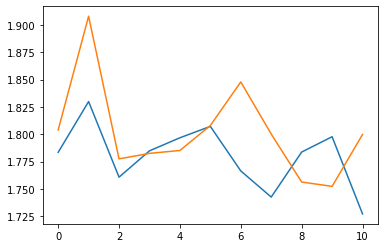

In [48]:
plt.plot(keep_old_train)
plt.plot(keep_old_val)
plt.show()

In [49]:
lower_path = "/home/hmeng/Mask_RCNN-for-SUN-RGB-D/logs/keep_train_lower/events.out.tfevents.1590519906.dsmlp-jupyter-hmeng"

In [50]:
lower_train, lower_val = [], []
for e in summary_iterator(lower_path):
    for v in e.summary.value:
        #if v.tag == 'loss' or v.tag == 'accuracy':
            #print(v.simple_value)
        if v.tag == "val_loss":
            lower_val.append(v.simple_value)
        elif v.tag == "loss":
            lower_train.append(v.simple_value)
        #print(v.tag)

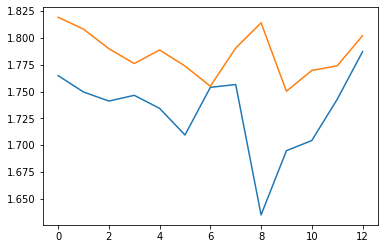

In [51]:
plt.plot(lower_train)
plt.plot(lower_val)
plt.show()

In [61]:
train, val = [], []

In [64]:

for e in summary_iterator(lower_path):
    for v in e.summary.value:
        #if v.tag == 'loss' or v.tag == 'accuracy':
            #print(v.simple_value)
        if v.tag == "val_loss":
            val.append(v.simple_value)
        elif v.tag == "loss":
            train.append(v.simple_value)
        #print(v.tag)

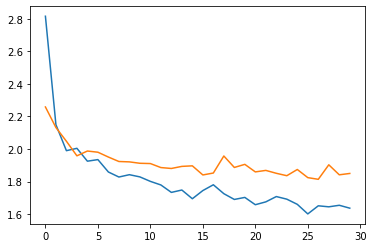

In [58]:
plt.plot(train)
plt.plot(val)
plt.show()

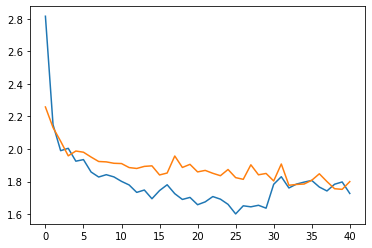

In [60]:
plt.plot(train)
plt.plot(val)
plt.show()

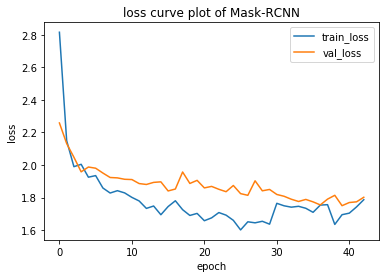

In [68]:
plt.title("loss curve plot of Mask-RCNN")
plt.plot(train, label="train_loss")
plt.plot(val,  label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Exam image inference

In [13]:
train_path = "sunrgbd_training_images.txt"
all_lines = []
with open(train_path, "r") as f:
    line = f.readline()
    while line:  
        all_lines.append(line.strip())
        line = f.readline()

In [14]:
label_root = "train_13/"
image_name = os.listdir(label_root)
print(len(image_name))
#image_name.index("img-000205.jpg")

5185


In [15]:
print(len(all_lines))
print(all_lines[204])

5285
SUNRGBD/kv2/kinect2data/000547_2014-06-08_18-49-09_260595134347_rgbf000021-resize/image/0000021.jpg


In [16]:
label_13 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
name_13 = ["bed", "books", "ceiling", 
                 "chair", "floor", "furniture", 
                 "objects", "picture", "sofa", 
                 "table", "tv", "wall", "window"]
label_dic = {}
for i in range(len(label_13)):
    label_dic[label_13[i]] = name_13[i]

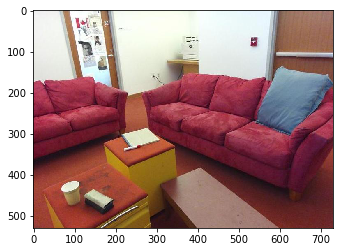

In [17]:
rgb_img = img = skimage.io.imread("img-000205.jpg")
plt.imshow(rgb_img)

In [18]:
predict_root = "../Mask_RCNN-for-SUN-RGB-D/detect/"
predict_file = "mask_best.txt"

In [23]:
#cl = "7 12  7 10  7  9 12  7  4  5 12 12  8" #best
cl = "7 12  7 10  7  9 12  7  4  5 12 12  8"  #204
h, w = rgb_img.shape[0], rgb_img.shape[1]
all_class = [int(c) for c in cl.split()]
predict_mask = np.loadtxt(os.path.join(predict_root, predict_file))
predict_mask = predict_mask.reshape((len(all_class), h, w))

['objects', 'wall', 'objects', 'table', 'objects', 'sofa', 'wall', 'objects', 'chair', 'floor', 'wall', 'wall', 'picture']


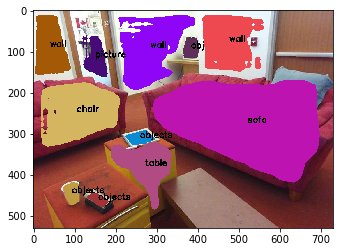

In [26]:
print([label_dic[a] for a in all_class])
all_pred = np.zeros(((530, 730)))
for i in range(predict_mask.shape[0]): 
    all_pred += predict_mask[i, :, :] * all_class[i]
    m = predict_mask[i, :, :].astype(bool)
    rgb_img[m] = [rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)]
    #data = frameData.annotation2D[i];
    centroid = np.where(m==True)
    c = all_class[i]
    #print(centroid)
    if centroid[0].any():
        x, y = np.mean(centroid[1]), np.mean(centroid[0])
        cv2.putText(rgb_img, label_dic[c], (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,0,0],2)
plt.imshow(rgb_img)
plt.show()

In [20]:
label_root = "train_13/"
label_name = "img13labels-000205.png"
true_mask = skimage.io.imread(os.path.join(label_root, label_name))

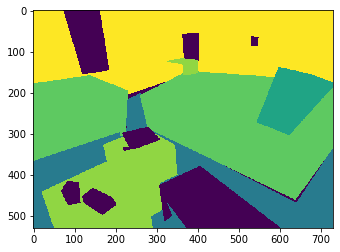

In [21]:
plt.imshow(true_mask)

In [22]:
print(true_mask.shape)

(530, 730)


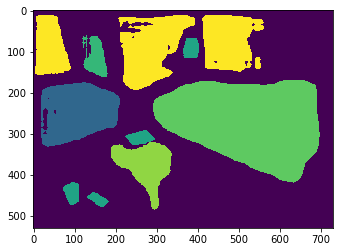

In [27]:
plt.imshow(all_pred)

In [29]:
true_mask = np.ndarray.flatten(true_mask)
all_pred = np.ndarray.flatten(all_pred)

In [30]:
print(true_mask.shape)
print(all_pred.shape)

(386900,)
(386900,)


In [31]:
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(true_mask)):
    if true_mask[i] == all_pred[i]:
        TP += 1
    elif true_mask[i] == 0 and all_pred[i] != 0:
        FP += 1
    elif true_mask[i] != 0 and all_pred[i] == 0:
        FN += 1
    else:
        TN += 1

In [32]:
print(TP, TN, FP, FN)

155132 36668 9744 185356


In [33]:
TP_rate = TP / (TP + FP)
TN_rate = TN / (TN + FN)
FP_rate = FP / (FP + TN)
FN_rate = FN / (FN + TP)

In [34]:
print(TP_rate, TN_rate, FP_rate, FN_rate)

0.9409010407821635 0.16515331675854864 0.20994570369731966 0.5443833556542375
